In [1]:
#imports
import json
import math
import folium
import geopy.distance
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
path = "traces/"



In [5]:

def load_data(f): 
    with open(path+f, 'r') as f:
        lines = f.readlines()
    traces = []
    traces_gps = []
    for line in lines:
        line_json = json.loads(line)
        if (bool(line_json)):
            traces.append(line_json)
    return traces


def pre_processing(traces_gps):
    erro_lat = 43.561752 - 43.336305
    error_long = 1.467910-1.279993
    #print(erro_lat)
    #print(error_long)
    processed_data = []
    cordinates =[]
    for trace in traces_gps:
        latlong =[]
        #print(trace)
        msg = trace['text']
        msg = msg.split('#')
        latlong.append(format(float(msg[0])/100.0 + erro_lat,"2f"))
        latlong.append(format(float(msg[1])/100.0+error_long,"2f"))
        if (trace['mac'] == '00800000A00048F6'):
                gw_cordinate = [43.5601286, 1.4675817]
        elif (trace['mac'] == '008000000000C2F1'):
            gw_cordinate = [43.561384, 1.456299]

        processed_data.append({
            'gps':latlong,
             'dr':int(msg[2]),
            'rssi' : trace['rssi'],
            'distance' : geopy.distance.distance(gw_cordinate, latlong).m,
            'gw' : trace['mac']
            

        })
        cordinates.append(latlong)
    return processed_data, cordinates

def plot_map(cordinates) : 
    #t0 = dt.datetime.now()
    #Toulouse City Coordinates
    Toulouse = [43.561752, 1.467910]
    sample_coords =cordinates
    # Build map 
    map_nyc = folium.Map(location=Toulouse, zoom_start=15, 
    tiles='cartodbpositron', width=640, height=480)
    # Plot coordinates using comprehension list
    [folium.CircleMarker(sample_coords[i], radius=1,
                color='#0080bb', fill_color='#0080bb').add_to(map_nyc) 
    for i in range(len(sample_coords))]
    return map_nyc
def plot_rssi_distance(processed_data,sf):
    distances = []
    rssi  =[]
    for d in processed_data :
        distances.append(d['distance'])
        rssi.append(d['rssi'])
    d, r = zip(*sorted(zip(distances, rssi)))
    #print(d)
    #print(r)
    minimum = min(r)
    print("Min RSSI : {} at distance : {}".format (minimum,d[r.index(minimum)]))
    plt.plot(d, r,'orange')
    plt.xlabel('Distance (meters)') 
    plt.ylabel('RSSI (DBm)') 
    plt.title('RSSI Evolution in Function of Distance (SF = {})'.format(sf)) 
    plt.show()
    
    

In [22]:
f = 'lopy.msg'
traces = load_data(f)
print('Received packets :' ,len(traces))
print('Reception Rate :{:2f} %'.format((len(traces)/177)*100))

print(traces)

Received packets : 36
Reception Rate :20.338983 %
[{'applicationID': '5', 'applicationName': 'lora-roaming', 'deviceName': 'lopy4-node', 'devEUI': '70b3d549967ceb93', 'devAddr': '0055486a', 'rxInfo': [{'gatewayID': '3235313214003900', 'uplinkID': 'aa50a2d0-6542-4fac-a391-5cf65a4bf07b', 'name': 'MikroTik', 'rssi': -67, 'loRaSNR': 9.5, 'location': {'latitude': 43.5608466, 'longitude': 1.4724846, 'altitude': 0}}], 'txInfo': {'frequency': 867100000, 'dr': 5}}, {'applicationID': '5', 'applicationName': 'lora-roaming', 'deviceName': 'lopy4-node', 'devEUI': '70b3d549967ceb93', 'rxInfo': [{'gatewayID': '3235313214003900', 'uplinkID': 'aa50a2d0-6542-4fac-a391-5cf65a4bf07b', 'name': 'MikroTik', 'rssi': -67, 'loRaSNR': 9.5, 'location': {'latitude': 43.5608466, 'longitude': 1.4724846, 'altitude': 0}}], 'txInfo': {'frequency': 867100000, 'dr': 5}, 'adr': False, 'fCnt': 0, 'fPort': 2, 'data': 'bW9oYW1lZA=='}, {'applicationID': '5', 'applicationName': 'lora-roaming', 'deviceName': 'lopy4-node', 'devE

244
171
Min RSSI : -120 at distance : 1013.2140060877932


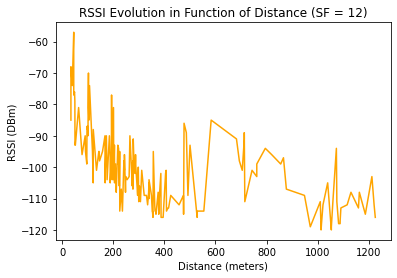

In [4]:
f1 = "exp22052020_SF12.mqtt"
traces,traces_gps = load_data(f1)
print(len(traces))
print(len(traces_gps))
processed_data12, cordinates = pre_processing(traces_gps)
#print(processed_data12)
plot_rssi_distance(processed_data12,12)


In [10]:

#cordinates = [['43.562522', '1.468586']]
#print(cordinates)
print(len(cordinates))
with open('cordinates.gps','w') as f:
    i = 0
    for gps in cordinates:
        f.write(str(gps[0])+','+str(gps[1]+','+str(processed_data12[i]['rssi'])+'\n'))
        i = i+1
plot_map(cordinates)

171


Min RSSI : -120 at distance : 860.8622379839935


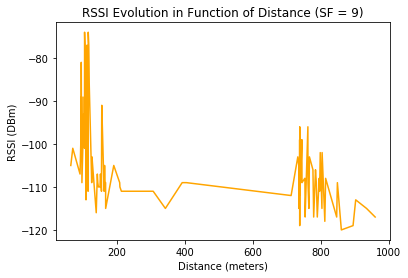

In [9]:
f2 = "exp22052020_SF9.mqtt"
traces,traces_gps = load_data(f2)
processed_data9, cordinates = pre_processing(traces_gps)
plot_rssi_distance(processed_data9,9)

In [10]:
plot_map(cordinates)

Min RSSI : -120 at distance : 748.9485018494521


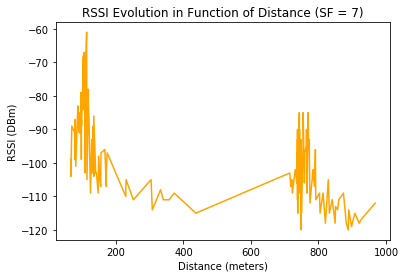

In [31]:
f2 = "exp22052020_sf7.mqtt"
traces,traces_gps = load_data(f2)
processed_data7, cordinates = pre_processing(traces_gps)
plot_rssi_distance(processed_data7,7)


In [55]:
plot_map(cordinates)

In [9]:
HB = 15.0 
HM = 1.0
freq = 868100000


GAMMA = 2.08
D0 = 40.0
LPLD0 = 127.41

def path_loss1(d,C):
    
    Lpl = (
                    (44.9 - 6.55 * math.log10(HB))
                    * (math.log10(d) - math.log10(1000))
                    + 45.5
                    + (35.46 - 1.1 * HM) * (math.log10(freq) - math.log10(1000000))
                    - 13.82 * math.log10(HM)
                    + 0.7 * HM
                    + C
                )
    return 14 -Lpl

def path_loss2(d):
    Lpl = LPLD0 + 10 * GAMMA * math.log10(d / D0)
    return 14 - Lpl
    
rssi1 = []
distances1 =[]
rssi2 = []
rssi3 = []
distances2 =[]
for d in range (40,550):
    rssi1.append(path_loss1(d,3))
    rssi3.append(path_loss1(d,0))
    distances1.append(d)
    rssi2.append(path_loss2(d))
    distances2.append(d)




171
125
(-0.7659351032117598, 2.358446100906823e-25)
(-85, -68, -74, -57, -77, -76, -79, -93, -93, -81, -96, -90, -95, -99, -87, -88, -87, -90, -70, -81, -85, -74, -95, -105, -88, -101, -95, -95, -98, -95, -90, -96, -104, -105, -102, -90, -104, -90, -97, -105, -97, -77, -102, -95, -90, -104, -81, -104, -93, -105, -99, -105, -108, -99, -99, -93, -94, -106, -95, -114, -107, -114, -98, -101, -96, -108, -103, -104, -103, -90, -91, -106, -105, -99, -98, -107, -91, -97, -102, -98, -96, -99, -109, -108, -100, -111, -106, -111, -101, -109, -109, -112, -108, -105, -110, -104, -109, -114, -114, -116, -95, -112, -114, -114, -115, -108, -115, -111, -102, -116, -116, -116, -102, -101, -114, -113, -113, -109, -112, -109, -115, -109, -116, -114, -114)
(34.55504886978635, 34.60233210167181, 39.830126251403506, 45.58703743552442, 45.67390907240995, 48.69970731626302, 50.01471330336301, 50.47249406828121, 51.826026782309214, 64.67789085020529, 78.08369938026681, 90.39179224278305, 91.58315269634166, 96.

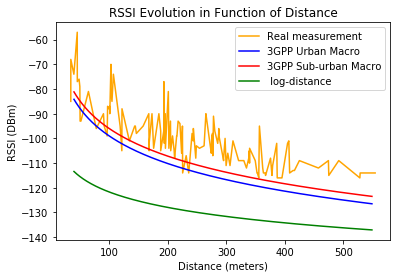

In [13]:
g1 = []
g2 = []
print(len(processed_data12))
for i in processed_data12:
    # print(i['gw'])
    if (i['gw'] == '00800000A00048F6'):
        g1.append(i)
    else:
        g2.append(i)
print(len(g1))
distances = []
rssi = []
for g in g1:
    distances.append(g['distance'])
    rssi.append(g['rssi'])
d, r = zip(*sorted(zip(distances, rssi)))

corr = pearsonr(d,r)
print(corr)
print(r)
print(d)
plt.plot(d, r, 'orange', label ='Real measurement')

plt.plot(distances1, rssi1, 'blue', label="3GPP Urban Macro")
plt.plot(distances1, rssi3, 'red', label="3GPP Sub-urban Macro")
plt.plot(distances2, rssi2, 'green', label=" log-distance")
plt.xlabel('Distance (meters)') 
plt.ylabel('RSSI (DBm)') 
plt.title('RSSI Evolution in Function of Distance') 
plt.legend() 
plt.show()